# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 17 - Regresión Logística V: Decision Tree
### Pilar García y Sonia Ruiz Pérez

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming:

In [37]:
#Librerías
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Separación de datos en 'train' y 'test'
from sklearn.model_selection import train_test_split

# Modelo Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score

pd.options.display.max_columns=None

- Ajustad un modelo de Decision Tree a nuestros datos.

In [38]:
#Creamos un dataframe con los datos del csv que nos interesa.
df=pd.read_csv('files/heart_eda_principal_encoding_estandar.csv',index_col=0)
df.head(3)

,age,resting_bp,cholesterol,fasting_bs,max_hr,oldpeak,heart_disease,male,chest_pain_type_ASY,chest_pain_type_ATA,chest_pain_type_NAP,chest_pain_type_TA,resting_ecg_LVH,resting_ecg_Normal,resting_ecg_ST,exercise_angina_yes,st_slope_Down,st_slope_Flat,st_slope_Up
0,-1.334331,0.548422,0.984547,-0.44069,1.290461,-0.864955,0,1,0,1,0,0,0,1,0,0,0,0,1
1,-0.390470,1.845686,-1.182352,-0.44069,0.633456,0.178110,1,0,0,0,1,0,0,1,0,0,0,1,0
2,-1.648952,-0.100209,0.865268,-0.44069,-1.748185,-0.864955,0,1,0,1,0,0,0,0,1,0,0,0,1


In [39]:
# Separamos los datos en X e y
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]
# Separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creamos objeto del modelo
arbol=DecisionTreeClassifier(random_state=0)
#Ajustamos el modelo
arbol.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

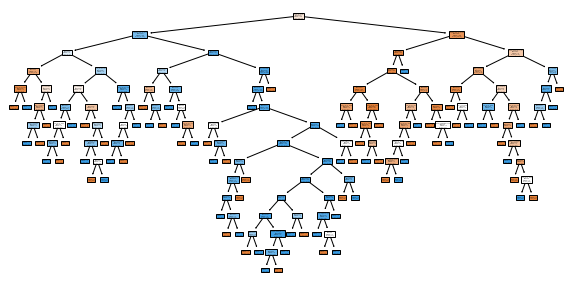

In [40]:
#Representamos gráficamente el árbol de decision
plt.figure(figsize=(10,5))
tree.plot_tree(arbol,feature_names=x_train.columns,filled=True)
plt.show()

`Este árbol es el obtenido con el máximo overfitting, ya que se genera sin ninguna restriccion en sus hiperparámetros. Por lo que vamos a modificar estos hiperparámetros para obtener un modelo más parsimonioso.`

In [41]:
# Obtenemos la raíz cuadrada del número de variables predictoras de nuestro árbol para saber
#  el "max_features" (número de columnas predictoras) que tendremos que aplicar.
max_features = np.sqrt(len(x_train.columns))
max_features

4.242640687119285

In [42]:
# Obtenemos la profundidad del árbol representado, para saber la máxima profundidad que deberemos
#  aplicar al modificar 'max_depth' en los hiperparámetros. Como máximo utilizaremos la mitad de esta.
arbol.tree_.max_depth

14

In [43]:
# Predicción para los datos de entrenamiento
y_pred_train1 = arbol.predict(x_train)
# Predicción para los datos de test
y_pred_test1 = arbol.predict(x_test)

In [44]:
# Creamos una función para obtener las métricas del modelo Decision Tree.
def obtener_metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {
        'accuracy': [accuracy_score(y_test, y_test_pred), accuracy_score(y_train, y_train_pred)],
        'precision': [precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)], 
        'recall': [recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)],
        'f1': [f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)],
        'kappa': [cohen_kappa_score(y_test, y_test_pred), cohen_kappa_score(y_train, y_train_pred)],
        "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [45]:
# Llamamos a la función.
df_resultados1 = obtener_metricas(y_test, y_train, y_pred_test1, y_pred_train1, "Decision Tree Codificadas Estandarizadas I")
df_resultados1

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.822695,0.855072,0.797297,0.825175,0.645764,test,Decision Tree Codificadas Estandarizadas I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree Codificadas Estandarizadas I


`Al obtener las métricas de este árbol podemos comprobar que hay Overfitting, ya que las metricas del modelo para los datos de train son mucho mejores que las de test.`

#### `Prueba 1`

In [46]:
# Definir diccionario con los hiperparámetros a modificar
# min_samples_split: número mínimo de observaciones que debe tener un nodo para dividirse, por defecto [10, 50, 100]
# min_samples_leaf: número mínimo de observaciones que debe tener cada uno de los nodos hijos para que se produzca la division, por defecto [10, 50, 100]
param1 = {"max_depth": [2,4,7], "max_features": [1,2,3,4], "min_samples_split": [10, 50, 200], "min_samples_leaf": [10, 50, 200]}

In [47]:
# Ajustar el modelo con GridSearchCV
# cv = 10 --> número de veces que hacemos la validación
# verbose = - 1 --> para no printear ningún mensaje en la pantalla
grid1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param1, cv=10, verbose=-1)

# Ajustamos el modelo
grid1.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 7], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 200],
                         'min_samples_split': [10, 50, 200]},
             verbose=-1)

In [48]:
#Obtenemos los mejores hiperparámetros para obtener un modelo parsimonioso.
mejor_modelo1=grid1.best_estimator_
mejor_modelo1

DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

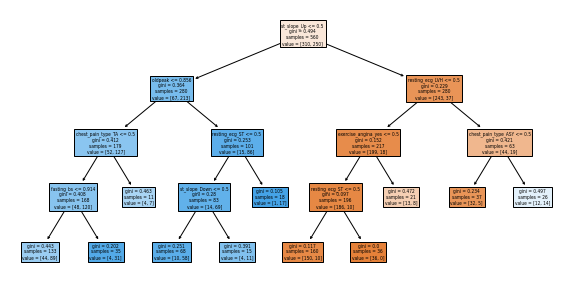

In [49]:
#Representamos gráficamente el árbol de decision nuevo
plt.figure(figsize=(10,5))
tree.plot_tree(mejor_modelo1,feature_names=x_train.columns,filled=True)
plt.show()

In [50]:
#Hacemos las nuevas predicciones
y_pred_test2=mejor_modelo1.predict(x_test)
y_pred_train2=mejor_modelo1.predict(x_train)

In [51]:
# Llamamos a la función para obtener las métricas.
df_resultados2 = obtener_metricas(y_test, y_train, y_pred_test2, y_pred_train2, "Decision Tree Codificadas Estandarizadas II")
df_resultados2

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.865248,0.816092,0.959459,0.881988,0.727328,test,Decision Tree Codificadas Estandarizadas II
1,0.817857,0.741830,0.908000,0.816547,0.639303,train,Decision Tree Codificadas Estandarizadas II


`Vemos que ahora tenemos un poco de underfitting ya que las métricas de los datos de test son mejores que las de train. Vamos a aumentar la profundidad para solucionar esta diferencia.`

#### `Prueba 2`

In [55]:
# Definir diccionario con los hiperparámetros a modificar
param2 = {"max_depth": [4,5,7], "max_features": [1,2,3,4], "min_samples_split": [40, 50, 75], "min_samples_leaf": [8, 10, 15]}

# Ajustar el modelo con GridSearchCV
grid2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param2, cv=10, verbose=-1)

# Ajustamos el modelo
grid2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 7], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [8, 10, 15],
                         'min_samples_split': [40, 50, 75]},
             verbose=-1)

In [56]:
#Obtenemos los mejores hiperparámetros para obtener un modelo parsimonioso.
mejor_modelo2=grid2.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=15,
                       min_samples_split=40, random_state=42)

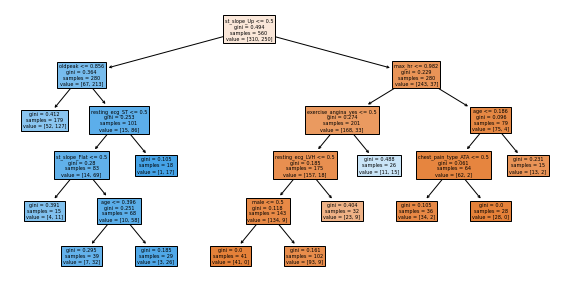

In [57]:
#Representamos gráficamente el árbol de decision nuevo
plt.figure(figsize=(10,5))
tree.plot_tree(mejor_modelo2,feature_names=x_train.columns,filled=True)
plt.show()

- Calculad las métricas a nuestro nuevo modelo.

In [58]:
#Hacemos las nuevas predicciones
y_pred_test3=mejor_modelo2.predict(x_test)
y_pred_train3=mejor_modelo2.predict(x_train)

In [59]:
# Llamamos a la función para obtener las métricas.
df_resultados3 = obtener_metricas(y_test, y_train, y_pred_test3, y_pred_train3, "Decision Tree Codificadas Estandarizadas III")
df_resultados3

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.836879,0.780220,0.959459,0.860606,0.668980,test,Decision Tree Codificadas Estandarizadas III
1,0.821429,0.745098,0.912000,0.820144,0.646375,train,Decision Tree Codificadas Estandarizadas III


`Al aumentar la profundidad y modificar los hiperparámetros 'min_samples_leaf','min_samples_split', vemos que nuestras métricas han mejorado, ya que tenemos menor diferencia entre las obtenidas con train y test. Seguimos teniendo algo de underfitting, pero es asumible. `

- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [63]:
#Creamos un dataframe con las métricas obtenidas en los anteriores análisis.
df_resultados_logistica=pd.read_csv('files/resultados_heart_logisticareg.csv',index_col=0)
df_resultados_logistica

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas


In [64]:
#Unimos las métricas obtenidas en el Decision Tree con las anteriores.
df_resultados_unidos=pd.concat([df_resultados_logistica,df_resultados1,df_resultados2,df_resultados3],axis=0)
df_resultados_unidos

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas
0,0.822695,0.855072,0.797297,0.825175,0.645764,test,Decision Tree Codificadas Estandarizadas I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree Codificadas Estandarizadas I
0,0.865248,0.816092,0.959459,0.881988,0.727328,test,Decision Tree Codificadas Estandarizadas II
1,0.817857,0.741830,0.908000,0.816547,0.639303,train,Decision Tree Codificadas Estandarizadas II
0,0.836879,0.780220,0.959459,0.860606,0.668980,test,Decision Tree Codificadas Estandarizadas III
1,0.821429,0.745098,0.912000,0.820144,0.646375,train,Decision Tree Codificadas Estandarizadas III


`Al comparar las métricas de los modelos de árboles de decisión con las que obtuvimos en regresión logística, podemos ver que las mejores métricas son las obtenidas con la Regresión Logística con las variables codificadas y estandarizadas. Porque aunque la R.Logística tiene un recall inferior al obtenido con el Decision Tree III, R.Logística tiene una kappa superior, es decir tiene mayor concordancia y sus mediciones se deben menos al azar. `

In [99]:
#Obtenemos la importancia de las variables predictoras.
importancia_predictoras=pd.DataFrame({'predictora':x_train.columns,'importancia':mejor_modelo2.feature_importances_})

#Ordenamos de mayor a menor los resultados de las importancias.
importancia_predictoras.sort_values(by=['importancia'],ascending=False,inplace=True)
importancia_predictoras.reset_index(inplace=True)
importancia_predictoras.drop(['index'],axis=1,inplace=True)
importancia_predictoras

,predictora,importancia
0,st_slope_Up,0.856988
1,exercise_angina_yes,0.078819
2,oldpeak,0.020168
3,resting_ecg_LVH,0.019308
4,max_hr,0.011328
5,male,0.003528
6,age,0.003452
7,resting_ecg_ST,0.002933
8,st_slope_Flat,0.002724
9,chest_pain_type_ATA,0.000753


In [100]:
#Agrupamos columnas que corresponden a las diferentes categorías de la misma variable.
st_slope=importancia_predictoras.iloc[[0,8,16]]
st_slope

,predictora,importancia
0,st_slope_Up,0.856988
8,st_slope_Flat,0.002724
16,st_slope_Down,0.000000


In [101]:
resting_ecg=importancia_predictoras.iloc[[3,7,14]]
resting_ecg

,predictora,importancia
3,resting_ecg_LVH,0.019308
7,resting_ecg_ST,0.002933
14,resting_ecg_Normal,0.000000


In [102]:
chest_pain_type=importancia_predictoras.iloc[[9,10,12,17]]
chest_pain_type

,predictora,importancia
9,chest_pain_type_ATA,0.000753
10,chest_pain_type_ASY,0.000000
12,chest_pain_type_TA,0.000000
17,chest_pain_type_NAP,0.000000


In [103]:
#Eliminamos las filas que vamos a sustituir.
importancia_predictoras.drop(st_slope.index,inplace=True)
importancia_predictoras.drop(resting_ecg.index,inplace=True)
importancia_predictoras.drop(chest_pain_type.index,inplace=True)
importancia_predictoras

,predictora,importancia
1,exercise_angina_yes,0.078819
2,oldpeak,0.020168
4,max_hr,0.011328
5,male,0.003528
6,age,0.003452
11,resting_bp,0.000000
13,fasting_bs,0.000000
15,cholesterol,0.000000


In [104]:
#Añadimos las filas con las importancias unificadas en los índices eliminados.
importancia_predictoras.loc[3]=['st_slope',st_slope['importancia'].sum()]
importancia_predictoras.loc[7]=['resting_ecg',resting_ecg['importancia'].sum()]
importancia_predictoras.loc[8]=['chest_pain_type',chest_pain_type['importancia'].sum()]
importancia_predictoras.sort_values(by=['importancia'],ascending=False,inplace=True)
importancia_predictoras

,predictora,importancia
3,st_slope,0.859712
1,exercise_angina_yes,0.078819
7,resting_ecg,0.022241
2,oldpeak,0.020168
4,max_hr,0.011328
5,male,0.003528
6,age,0.003452
8,chest_pain_type,0.000753
11,resting_bp,0.000000
13,fasting_bs,0.000000


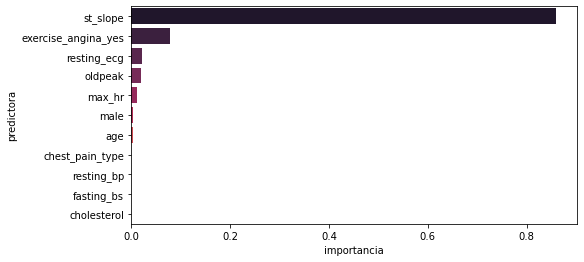

In [105]:
#Representación gráfica de la importancia.
plt.figure(figsize=(8,4))
sns.barplot(x='importancia',y='predictora',data=importancia_predictoras,palette='rocket')
plt.show();

`Al representar la importancia de las variables empleadas en el modelo, podemos ver que la variable con mayor importancia es 'st_slope', ayuda en un 86% a explicar la variable repuesta en el modelo.`

In [106]:
#Guardamos el dataframe con los resultados de las métricas que tenemos hasta ahora
df_resultados_unidos.to_csv('files/resultados_heart_logisticareg_decisiontree.csv')

**Happy coding** 📊📈📉